In [142]:
import numpy as np
from matplotlib import pyplot as plt

In [143]:
def GetTransitionMatrix(D):
    n = D.shape[0]
    total = n*n
    transitionMatrix = np.zeros((total,total))
    for k in range(total):
        i = k//n
        j = k%n
        
        if D[i,j] > 0:
            continue
        
        up   = i - 1
        down = i + 1
        left = j - 1
        right = j + 1  
        
        if up > 0 and D[up,j] < 1:
            nextI = up*n + j
            transitionMatrix[k,nextI] = 1
        
        if down < N and D[down,j] < 1:
            nextI = down*n + j
            transitionMatrix[k,nextI] = 1
            
        if left > 0 and D[i,left] < 1:
            nextI = i*n + left
            transitionMatrix[k,nextI] = 1
        
        if right < N and D[i,right] < 1:
            nextI = i*n + right
            transitionMatrix[k,nextI] = 1
            
            
        den = np.sum(transitionMatrix[k,:])
        if den > 0:
            transitionMatrix[k,:] = transitionMatrix[k,:]/den
        
    return transitionMatrix
                

In [144]:
def RunValueIteration(V,T,R):
    err = 100
    Vnew = V
    gamma = 0.99
    while err > 1e-1:
        Vnew = R + gamma*np.dot(T,V)
        err = np.linalg.norm(Vnew-V)
        V = Vnew
        #print(err)
    return Vnew

In [145]:
def ConvertV2Map(V,normalize=True):
    n = int(np.sqrt(V.shape[0]))
    M = np.zeros((n,n))
    for k in range(V.shape[0]):
        i = k//n
        j = k%n
        M[i,j] = V[k]
    
    if normalize:
        M = M/np.max(M)
    return M

Goal i,j: 6 3


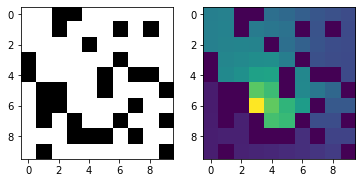

In [178]:
N = 10
goali,goalj = (6,3)
A = np.random.rand(N,N)
A[A >  0.7] = 1
A[A <= 0.7] = 0
V0 = np.zeros((N*N,1))
R = np.zeros((N*N,1))
R[int(goali*N+goalj),0] = 1000
A[goali,goalj] = 0.0
T = GetTransitionMatrix(A)
Vnew = RunValueIteration(V0,T,R)
M = ConvertV2Map(Vnew)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.imshow(A,cmap='Greys',vmin=0,vmax=1)
ax2.imshow(M)
print("Goal i,j:",goali,goalj)